# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №2: Линейные модели


###### <hr\>
**Общая информация**

**Срок сдачи:** 5 ноября 2019, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 5 ноября, -4 балла после 06:00 12 ноября, -6 баллов после 06:00 19 ноября  -8 баллов после 06:00 26 ноября.

При отправлении ДЗ указывайте фамилию в названии файла Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:
[ML0919, Задание 2] Фамилия Имя.<br\>

Используйте данный Ipython Notebook при оформлении домашнего задания.

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw2.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст, если явно не указана такая возможность. В противном случае -1 балл
<hr\>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

Здравствуйте, уважаемые студенты! 

В этом задании мы будем реализовать линейные модели. Необходимо реализовать линейную и логистическую регрессии с L2 регуляризацией

# Теоретическое введение



Линейная регрессия решает задачу регрессии и оптимизирует функцию потерь MSE 

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right], $$ где $y_i$ $-$ целевая функция,  $a_i = a(x_i) =  \langle\,x_i,w\rangle ,$ $-$ предсказание алгоритма на объекте $x_i$, $w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Не забываем, что здесь и далее  мы считаем, что в $x_i$ есть тождественный вектор единиц, ему соответствует вес $w_0$.


Логистическая регрессия является линейным классификатором, который оптимизирует так называемый функционал log loss:

$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right],$$
где  $y_i  \in \{0,1\}$ $-$ метка класса, $a_i$ $-$ предсказание алгоритма на объекте $x_i$. Модель пытается предсказать апостериорую вероятность объекта принадлежать к классу "1":
$$ p(y_i = 1 | x_i) = a(x_i) =  \sigma( \langle\,x_i,w\rangle ),$$
$w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Функция $\sigma(x)$ $-$ нелинейная функция, пероводящее скалярное произведение объекта на веса в число $\in (0,1)$ (мы же моделируем вероятность все-таки!)

$$\sigma(x) = \frac{1}{1 + \exp(-x)}$$

Если внимательно посмотреть на функцию потерь, то можно заметить, что в зависимости от правильного ответа алгоритм штрафуется или функцией $-\log a_i$, или функцией $-\log (1 - a_i)$.



Часто для решения проблем, которые так или иначе связаны с проблемой переобучения, в функционал качества добавляют слагаемое, которое называют ***регуляризацией***. Итоговый функционал для линейной регрессии тогда принимает вид:

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right] + \frac{1}{C}R(w) $$

Для логистической: 
$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right] +  \frac{1}{C}R(w)$$

Самое понятие регуляризации введено основателем ВМК академиком Тихоновым https://ru.wikipedia.org/wiki/Метод_регуляризации_Тихонова

Идейно методика регуляризации заключается в следующем $-$ мы рассматриваем некорректно поставленную задачу (что это такое можно найти в интернете), для того чтобы сузить набор различных вариантов (лучшие из которых будут являться переобучением ) мы вводим дополнительные ограничения на множество искомых решений. На лекции Вы уже рассмотрели два варианта регуляризации.

$L1$ регуляризация:
$$R(w) = \sum_{j=1}^{D}|w_j|$$
$L2$ регуляризация:
$$R(w) =  \sum_{j=1}^{D}w_j^2$$

С их помощью мы ограничиваем модель в  возможности выбора каких угодно весов минимизирующих наш лосс, модель уже не сможет подстроиться под данные как ей угодно. 

Вам нужно добавить соотвествущую Вашему варианту $L2$ регуляризацию.

И так, мы поняли, какую функцию ошибки будем минимизировать, разобрались, как получить предсказания по объекту и обученным весам. Осталось разобраться, как получить оптимальные веса. Для этого нужно выбрать какой-то метод оптимизации.



Градиентный спуск является самым популярным алгоритмом обучения линейных моделей. В этом задании Вам предложат реализовать стохастический градиентный спуск или  мини-батч градиентный спуск (мини-батч на русский язык довольно сложно перевести, многие переводят это как "пакетный", но мне не кажется этот перевод удачным). Далее нам потребуется определение **эпохи**.
Эпохой в SGD и MB-GD называется один проход по **всем** объектам в обучающей выборки.
* В SGD градиент расчитывается по одному случайному объекту. Сам алгоритм выглядит примерно так:
        1) Перемешать выборку
        2) Посчитать градиент функции потерь на одном объекте (далее один объект тоже будем называть батчем)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* В Mini Batch SGD - по подвыборке объектов. Сам алгоритм выглядит примерно так::
        1) Перемешать выборку, выбрать размер мини-батча (от 1 до размера выборки)
        2) Почитать градиент функции потерь по мини-батчу (не забыть поделить на  число объектов в мини-батче)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* Для отладки алгоритма реализуйте возможность  вывода средней ошибки на обучении модели по объектам (мини-батчам). После шага градиентного спуска посчитайте значение ошибки на объекте (или мини-батче), а затем усредните, например, по ста шагам. Если обучение проходит корректно, то мы должны увидеть, что каждые 100 шагов функция потерь уменьшается. 
* Правило останова - максимальное количество эпох
    


# Теоретические вопросы (2 балла)
В этой части Вам будут предложены теоретичские вопросы и задачи по теме. Вы, конечно, можете списать их у своего товарища или найти решение в интернете, но учтите, что они обязательно войдут в теоретический коллоквиум. Лучше разобраться в теме сейчас и успешно ответить на коллоквиуме, чем списать, не разобравшись в материале, и быть терзаемым совестью. 


Формулы надо оформлять в формате **LaTeX**.

Задача 1. Градиент для линейной регрессии.
* Выпишите формулу обновления весов для линейной регрессии с L2 регуляризацией для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент?


\
Формула для $n=N$:
\
$$L(w) = {{1}\over{N}}\cdot (\sum_i(y_i-a_i)^2) + {{1}\over{C}}\cdot R(w)  =$$

$$ = {{1}\over{N}}\cdot (\sum_i(y_i-a_i)^2) + {{1}\over{C}}\cdot (\sum_j^D w_j^2) = $$

$$ = {{1}\over{N}}\cdot (X\cdot w - y)^T\cdot(X\cdot w - y) + {{1}\over{C}}\cdot w^T\cdot w $$

$$ grad L(w) = {{1}\over{N}}\cdot(2X^T\cdot X\cdot w - 2X^T\cdot y) + {{1}\over{C}}\cdot 2w$$

$$ w_{new} = w_{old} - \alpha \cdot grad L(w_{old}, X, y)$$



При $n<N$ используем выборку $\{j_1, j_2,...,j_n\} \subset \{1,2,...,N\}$. Введем вектор $X_{batch}$ и вектор $y_{batch}$, $i$-тые компоненты которых равны соответсвующим $i$-тым компонентам $X$ и $y$, если $i \in \{j_1, j_2,...,j_n\}$, иначе - равны 0. Также формула обновления весов принимает вид:

$$ w_{new} = w_{old} - \alpha \cdot \Bigr(
{{1}\over{n}}\cdot(2X_{batch}^T\cdot X_{batch}\cdot w - 2X_{batch}^T\cdot y_{batch}) + {{1}\over{C}}\cdot 2w \Bigr)
$$



Задача 2. Градиент для логистической регрессии.
* Выпишите формулу обновления весов для логистической регрессии с L2 регуляризацией  для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент? Как соотносится этот градиент с градиентом, возникающий в задаче линейной регрессии?

Подсказка: Вам градиент, которой получается если “в лоб” продифференцировать,  надо немного преобразовать.
Надо подставить, что $1 - \sigma(w,x) $ это  $1 - a(x_i)$, а  $-\sigma(w,x)$ это $0 - a(x_i)$.  Тогда получится свести к одной красивой формуле с линейной регрессией, которую программировать будет намного проще.

\
Формула для $n=N$:
\
$$L = {{1}\over{N}}\cdot \big(\sum_i y_i \cdot log(a_i) + (1-y_i)\cdot log(1-a_i) \big) + {{1}\over{C}}\cdot R(w)  =$$

$$ = {{1}\over{N}}\cdot \big(\sum_i y_i \cdot log(a_i) + (1-y_i)\cdot log(1-a_i) \big) + {{1}\over{C}}\cdot (\sum_j^D w_j^2) = $$

$$ = {{1}\over{N}}\cdot \big(\sum_i y_i \cdot log(a_i) + (1-y_i)\cdot log(1-a_i) \big) + {{1}\over{C}}\cdot w^T\cdot w $$

$${{d}\over{da}}L = -{{1}\over{N}} \cdot \Bigr( {{y}\over{a}} - {{1-y}\over{1-a}} \Bigr)=$$

$$ = {{1}\over{N}} \cdot \Bigr( {{a-y}\over{a \cdot (1-a)}}\Bigr)=$$

$$ = {{1}\over{N}} \cdot \Bigr( {{a-y}\over{{{exp(-(x,w))}\over{1 + exp((x,w))}}}}\Bigr)$$

$$a(x,w) = \sigma((x,w)) = {{1}\over{1 + exp(-(x,w))}}$$

$${{d}\over{dw}}a(x,w) = {{x \cdot exp(-(x,w))}\over{1 + exp((x,w))}}$$

$${{d}\over{dw}}L = {{{d}\over{da}}L}\cdot{{{d}\over{dw}}a} = {{1}\over{N}} \cdot X^T\cdot(a-y) + {{2}\over{C}}w$$.

$$ w_{new} = w_{old} - \alpha \cdot {{d}\over{dw}} L(w_{old}, X, y)$$

\
При $n<N$ используем выборку $\{j_1, j_2,...,j_n\} \subset \{1,2,...,N\}$. Введем вектор $X_{batch}$ и вектор $y_{batch}$, $i$-тые компоненты которых равны соответсвующим $i$-тым компонентам $X$ и $y$, если $i \in \{j_1, j_2,...,j_n\}$, иначе - равны 0. Тогда формула обновления весов принимает вид:

$$ w_{new} = w_{old} - \alpha \cdot {{1}\over{n}}\cdot X_{batch}^T\cdot(a(X_{batch},w)-y_{batch}) + {{2}\over{C}}w$$


Задача 3. Точное решение линейной регрессии

На лекции было показано, что точное решение линейной регрессии имеет вид $w = (X^TX)^{-1}X^TY $. 
* Покажите, что это действительно является точкой минимума в случае, если матрица X имеет строк не меньше, чем столбцов и имеет полный ранг. Подсказка: посчитайте Гессиан и покажите, что в этом случае он положительно определен. 
* Выпишите точное решение для модели с $L2$ регуляризацией. Как L2 регуляризация помогает с точным решением где матрица X имеет линейно зависимые признаки?

Точное решение для линейной регрессии было получено из условия первого порядка для минимизации функционала 
$$ L(w)= {{1}\over{N}}\cdot (X\cdot w - y)^T\cdot(X\cdot w - y) $$
Имеет вид:
$$ {{d}\over{dw}}L(w) =  {{1}\over{N}}\cdot \Bigr( 2\cdot X^T \cdot X \cdot w - 2 \cdot X^T \cdot y \Bigr) =0$$

Посчитаем вторую производную:

$${{d^2}\over{{dw}^2}}L(w) = 2 \cdot X^T \cdot X$$

Матрица $X^T\cdot X$ положительно определенная. Значит это минимум.

Задача 4.  Предсказываем вероятности.

Когда говорят о логистической регрессии, произносят фразу, что она "предсказывает вероятности положительного класса". Давайте разберемся, что же за этим стоит. Посчитаем математическое ожидание функции потерь и проверим, что предсказание алгоритма, оптимизирующее это мат. ожидание, будет являться вероятностью положительного класса. 

И так, функция потерь на объекте $x_i$, который имеет метку $y_i \in \{0,1\}$  для предсказания $a(x_i)$ равна:
$$L(y_i, b) =-[y_i == 1] \log a(x_i)  - [y_i == 0] \log(1 - a(x_i)) $$

Где $[]$ означает индикатор $-$ он равен единице, если значение внутри него истинно, иначе он равен нулю. Тогда мат. ожидание при условии конкретного $x_i$  по определение мат. ожидания дискретной случайной величины:
$$E(L | x_i) = -p(y_i = 1 |x_i ) \log a(x_i)  - p(y_i = 0 | x_i) \log( 1 - a(x_i))$$
* Докажите, что значение $a(x_i)$, минимизирующее данное мат. ожидание, в точности равно $p(y_i = 1 |x_i)$, то есть равно вероятности положительного класса.

Подсказка: возможно, придется воспользоваться, что  $p(y_i = 1 | x_i) + p(y_i = 0 | x_i) = 1$


Целевая переменная принимает 2 значения, 
возьмем распределение Бернулли:
\
$ {{p_+}\over{p_-}}  = {{p_+}\over{1-p_+}} = exp((w,x))$
\
Отсюда выразим $p_+$:
$$p_+ = {{exp((x,w))}\over{1+exp((x,w))}} = $$
\
$$ {{exp((x,w))/exp((x,w))}\over{(1+exp((x,w)))/exp((x,w))}} = $$
\
$$ {{1}\over{exp(-(x,w))+1}} $$


Задача 5.  Смысл регуляризации.

Нужно ли в L1/L2 регуляризации использовать свободный член $w_0$ (который не умножается ни на какой признак)?

Подсказка: подумайте, для чего мы вводим $w_0$

Свободный член $w_0$ не используется в регуляризации $L_1/L_2$

#  Реализация линейной модели (5 баллов)

## Зачем нужны батчи?


Как Вы могли заметить из теоретического введения, что в случае SGD, что в случа mini-batch GD,  на каждой итерации обновление весов  происходит только по небольшой части данных (1 пример в случае SGD, batch примеров в случае mini-batch). То есть для каждой итерации нам *** не нужна вся выборка***. Мы можем просто итерироваться по выборке, беря батч нужного размера (далее 1 объект тоже будем называть батчом).

Легко заметить, что в этом случае нам не нужно загружать все данные в оперативную память, достаточно просто считать батч с диска, обновить веса, считать диска другой батч и так далее. В целях упрощения домашней работы, прямо с диска  мы считывать не будем, будем работать с обычными numpy array. 





## Немножко про генераторы в Python



Идея считывания данных кусками удачно ложится на так называемые ***генераторы*** из языка Python. В данной работе Вам предлагается не только разобраться с логистической регрессией, но  и познакомиться с таким важным элементом языка.  При желании Вы можете убрать весь код, связанный с генераторами, и реализовать логистическую регрессию и без них, ***штрафоваться это никак не будет***. Главное, чтобы сама модель была реализована правильно, и все пункты были выполнены. 

Подробнее можно почитать вот тут https://anandology.com/python-practice-book/iterators.html


К генератору стоит относиться просто как к функции, которая порождает не один объект, а целую последовательность объектов. Новое значение из последовательности генерируется с помощью ключевого слова ***yield***. Ниже Вы можете насладиться  генератором чисел Фибоначчи.

In [122]:
def fib(max_iter=4):
    a, b = 0, 1
    iter_num = 0
    while 1:
        yield a
        a, b = b, a + b
        iter_num += 1
        if iter_num == max_iter:
            break

Вот так можно сгенерировать последовательность Фибоначчи. 

Заметьте, что к генераторам можно применять некоторые стандартные функции из Python, например enumerate.

In [123]:
new_generator = fib()
for j, fib_val in enumerate(new_generator):
    print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Пересоздавая объект, можно сколько угодно раз генерировать заново последовательность. 

In [127]:
for i in range(0, 3):
    new_generator = fib()
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


А вот так уже нельзя.

In [128]:
new_generator = fib()
for i in range(0, 3):
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Концепция крайне удобная для обучения  моделей $-$ у Вас есть некий источник данных, который Вам выдает их кусками, и Вам совершенно все равно откуда он их берет. Под ним может скрывать как массив в оперативной памяти, как файл на жестком диске, так и SQL база данных. Вы сами данные никуда не сохраняете, оперативную память экономите.

Если Вам понравилась идея с генераторами, то Вы можете реализовать свой, используя прототип batch_generator. В нем Вам нужно выдавать батчи признаков и ответов для каждой новой итерации спуска. Если не понравилась идея, то можете реализовывать SGD или mini-batch GD без генераторов.

In [285]:
from sklearn.utils import shuffle as skshuffle

def batch_generator(X, y, shuffle=True, batch_size=1):
    """
    Гератор новых батчей для обучения
    X          - матрица объекты-признаки
    y_batch    - вектор ответов
    shuffle    - нужно ли случайно перемешивать выборку
    batch_size - размер батча ( 1 это SGD, > 1 mini-batch GD)
    Генерирует подвыборку для итерации спуска (X_batch, y_batch)
    """
    
    X_shuffle, y_shuffle = skshuffle(X, y, random_state=0)        
    
    for i in range(X.shape[0] // batch_size):
        X_batch = X_shuffle[i*batch_size:i*batch_size + batch_size, :]
        y_batch = y_shuffle[i*batch_size:i*batch_size + batch_size]
        yield (X_batch, y_batch)

In [309]:
#%%pycodestyle

import math

def sigmoid(x):
    """
    Вычисляем значение сигмоида.
    X - выход линейной модели
    """
    
    return 1 / (1 + math.exp(-x))

from sklearn.base import BaseEstimator, ClassifierMixin
from functools import reduce

class MySGDClassifier(BaseEstimator, ClassifierMixin):
    
    def __init__(self, batch_generator, C=1, alpha=0.01, max_epoch=10, model_type='lin_reg'):
        """
        batch_generator -- функция генератор, которой будем создавать батчи
        C - коэф. регуляризации
        alpha - скорость спуска
        max_epoch - максимальное количество эпох
        model_type - тим модели, lin_reg или log_reg
        """
        
        self.C = C
        self.alpha = alpha
        self.max_epoch = max_epoch
        self.batch_generator = batch_generator
        self.errors_log = {'iter' : [], 'loss' : []}  
        self.model_type = model_type
        
    def calc_loss(self, X_batch, y_batch):
        """
        Считаем функцию потерь по батчу 
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        
        batch_size = X_batch.shape[0]
        sum = 0
        # Get reg
        reg = np.sum(self.weights**2) - self.weights[len(self.weights) - 1]**2

        if (self.model_type == 'lin_reg'):
            # Get MSE
            for object_num in range(batch_size):
                # Prediction for an object
                a = np.dot(self.weights, X_batch[object_num])
                sum += (y_batch[object_num] - a) ** 2

            sum *= 1 / batch_size

        else:
            for object_num in range(batch_size):
                # Prediction for an object
                a = sigmoid(np.dot(self.weights, X_batch[object_num]))
                sum += y_batch[object_num]*math.log(a) + (1-y_batch[object_num])*math.log(1-a)

            sum *= -1 / batch_size
                        
        return sum + reg/self.C
    
    def calc_loss_grad(self, X_batch, y_batch):
        """
        Считаем  градиент функции потерь по батчу (то что Вы вывели в задании 1)
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        
        batch_size = X_batch.shape[0]
        dim = X_batch.shape[1]
        loss_grad = []
        
        if (self.model_type == 'lin_reg'):
            # Get gradient element
            for grad_num in range(dim):
                sum = 0

                # Get sum
                for object_num in range(batch_size):
                    # Prediction for an object
                    a = np.dot(self.weights, X_batch[object_num])
                    sum += (y_batch[object_num] - a) * X_batch[object_num, grad_num]

                sum *= -2 / batch_size

                # Reg derivative
                sum += (2/self.C) * self.weights[grad_num]
                loss_grad.append(sum)

        else:
            # Get gradient element
            for grad_num in range(dim):
                sum = 0

                # Get sum
                for object_num in range(batch_size):
                    # Prediction for an object
                    product = np.dot(self.weights, X_batch[object_num])
                    a = sigmoid(product)                    
                    mult1 = y_batch[object_num]/a - (1-y_batch[object_num])/(1-a)
                    mult2 = (X_batch[object_num, grad_num]*math.exp(-product)) / (1+math.exp(-product))**2
                
                    sum += mult1 * mult2
                
                sum *= -1 / batch_size

                # Reg derivative
                sum += (2/self.C) * self.weights[grad_num]
                loss_grad.append(sum)

        loss_grad[len(loss_grad) - 1] -= (2/self.C) * self.weights[len(self.weights) - 1]
                
        return np.array(loss_grad)
    
    def update_weights(self, new_grad):
        """
        Обновляем вектор весов
        new_grad - градиент по батчу
        """

        self.weights -= self.alpha * new_grad
    
    def fit(self, X, y, batch_size=1):
        '''
        Обучение модели
        X - матрица объекты-признаки
        y - вектор ответов
        '''
        
        init_step_count = 100
        
        # Append extra dimension (scalar product <x, w> + w0)
        X = np.pad(X, ((0, 0), (0, 1)), mode="constant", constant_values=1)
        
        # Нужно инициализровать случайно веса
        self.weights = np.random.randn(X.shape[1])
        
        for n in range(0, self.max_epoch):
            new_epoch_generator = self.batch_generator(X, y, batch_size=batch_size)
            step_count = 0
            total_loss = 0
            
            for batch_num, new_batch in enumerate(new_epoch_generator):
                X_batch = new_batch[0]
                y_batch = new_batch[1]

                batch_grad = self.calc_loss_grad(X_batch, y_batch)
                self.update_weights(batch_grad)

                total_loss += self.calc_loss(X_batch, y_batch)
                step_count += 1
                
                if step_count == init_step_count:
                    batch_loss = total_loss / init_step_count
                    self.errors_log['iter'].append(batch_num)
                    self.errors_log['loss'].append(batch_loss)
                    step_count = 0
                    total_loss = 0
                
        return self
        
    def predict(self, X):
        '''
        Предсказание класса
        X - матрица объекты-признаки
        Не забудте тип модели (линейная или логистическая регрессия)!
        '''
        
        # Желательно здесь использовать матричные операции между X и весами, например, numpy.dot 
        return y_hat

Запустите обе регрессии на синтетических данных. 


Выведите полученные веса и нарисуйте разделяющую границу между классами (используйте только первых два веса для первых двух признаков X[:,0], X[:,1] для отображения в 2d пространство ).  

In [358]:
def plot_decision_boundary(clf):
    Xpoint = np.array([-5, 9]) 
    plt.ylim(-8., 4.)
    plt.plot(Xpoint,
         (-clf.weights[2]/clf.weights[1]) 
         - (clf.weights[0]/clf.weights[1])*Xpoint)

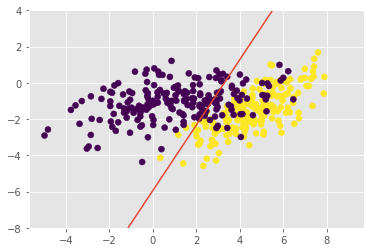

In [399]:
np.random.seed(0)

C1 = np.array([[0., -0.8], [1.5, 0.8]])
C2 = np.array([[1., -0.7], [2., 0.7]])
gauss1 = np.dot(np.random.randn(200, 2) + np.array([5, 3]), C1)
gauss2 = np.dot(np.random.randn(200, 2) + np.array([1.5, 0]), C2)

X = np.vstack([gauss1, gauss2])
y = np.r_[np.ones(200), np.zeros(200)]

classifier = MySGDClassifier(batch_generator=batch_generator, 
                             max_epoch=10, alpha=0.01, C=10, model_type='log_reg')
classifier.fit(X, y, batch_size=1)

plt.scatter(X[:,0], X[:,1], c=y)
plot_decision_boundary(classifier)

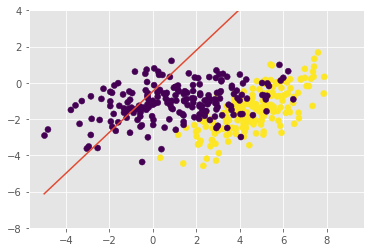

In [412]:
np.random.seed(0)

C1 = np.array([[0., -0.8], [1.5, 0.8]])
C2 = np.array([[1., -0.7], [2., 0.7]])
gauss1 = np.dot(np.random.randn(200, 2) + np.array([5, 3]), C1)
gauss2 = np.dot(np.random.randn(200, 2) + np.array([1.5, 0]), C2)

X = np.vstack([gauss1, gauss2])
y = np.r_[np.ones(200), np.zeros(200)]

classifier = MySGDClassifier(batch_generator=batch_generator, 
                             max_epoch=1, alpha=0.01, C=10, model_type='lin_reg')
classifier.fit(X, y, batch_size=1)

plt.scatter(X[:,0], X[:,1], c=y)
plot_decision_boundary(classifier)

Далее будем анализировать Ваш алгоритм. 
Для этих заданий используйте датасет ниже.

In [158]:
from sklearn.datasets import make_classification

In [414]:
X, y = make_classification(n_samples=100000, n_features=10, 
                           n_informative=4, n_redundant=0, 
                           random_state=123, class_sep=1.0,
                           n_clusters_per_class=1)

Покажите сходимости обеих регрессией на этом датасете: изобразите график  функции потерь, усредненной по $N$ шагам градиентого спуска, для разных `alpha` (размеров шага). Разные `alpha` расположите на одном графике. 

$N$ можно брать 10, 50, 100 и т.д. 

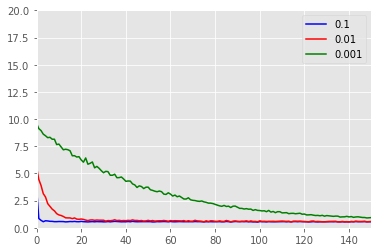

In [390]:
alpha_list = [0.1, 0.01, 0.001]
loss_dict = {'0': [], '1': [], '2': []}

for i in range(len(alpha_list)):
    clf = MySGDClassifier(model_type='log_reg', batch_generator=batch_generator, max_epoch=1, alpha=alpha_list[i], C=1)
    clf.fit(X, y, batch_size=20)
    loss_dict[i] = clf.errors_log['loss']
    
plt.axis([0, 150, 0, 20])
plt.plot(loss_dict[0], '-b', label=alpha_list[0])
plt.plot(loss_dict[1], '-r', label=alpha_list[1])
plt.plot(loss_dict[2], '-g', label=alpha_list[2])
plt.legend()
plt.show()

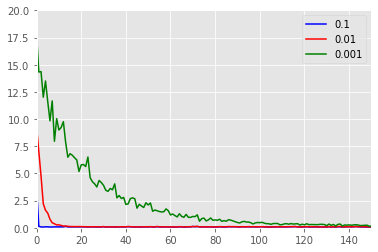

In [388]:
alpha_list = [0.1, 0.01, 0.001]
loss_dict = {'0': [], '1': [], '2': []}

for i in range(len(alpha_list)):
    clf = MySGDClassifier(model_type='lin_reg', batch_generator=batch_generator, max_epoch=1, alpha=alpha_list[i], C=1)
    clf.fit(X, y, batch_size=10)
    loss_dict[i] = clf.errors_log['loss']
    
plt.axis([0, 150, 0, 20])
plt.plot(loss_dict[0], '-b', label=alpha_list[0])
plt.plot(loss_dict[1], '-r', label=alpha_list[1])
plt.plot(loss_dict[2], '-g', label=alpha_list[2])
plt.legend()
plt.show()

Что Вы можете сказать про сходимость метода при различных `alpha`? Какое значение стоит выбирать для лучшей сходимости?

лучше вырбрать среднее 0.01 (маленькое долго сходится, большое может проскочить искомое значение)

Изобразите график среднего значения весов для обеих регрессий в зависимости от коеф. регуляризации С из `np.logspace(3, -3, 10)` 

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:52: RuntimeWarning: overflow encountered in double_scalars
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:64: RuntimeWarning: overflow encountered in double_scalars
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:45: RuntimeWarning: overflow encountered in square
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:45: RuntimeWarning: overflow encountered in double_scalars
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:87: RuntimeWarning: overflow encountered in double_scalars
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:92: RuntimeWarning: overflow encountered in double_scalars
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:87: RuntimeWarning: invalid value encountered in double_scalars


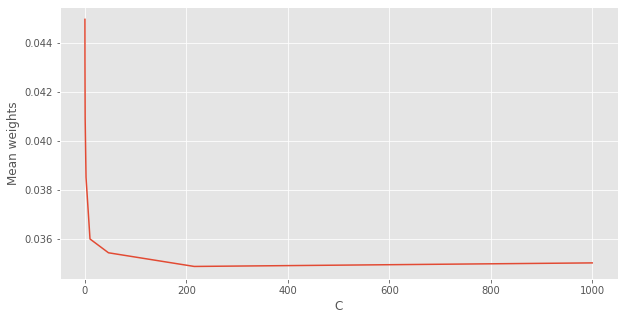

In [422]:
plt.figure(figsize=(10, 5))
coefs = np.logspace(3, -3, 10)
weights_mean = np.zeros(coefs.shape)

for i, C in enumerate(coefs):
    model = MySGDClassifier(model_type='lin_reg', 
                            batch_generator=batch_generator, 
                            max_epoch=1, 
                            alpha=0.01,
                            C=C)
    model.fit(X, y, batch_size=100)
    weights_mean[i] = model.weights.mean()
    
plt.plot(coefs, weights_mean)
plt.xlabel('C')
plt.ylabel('Mean weights')
plt.show()

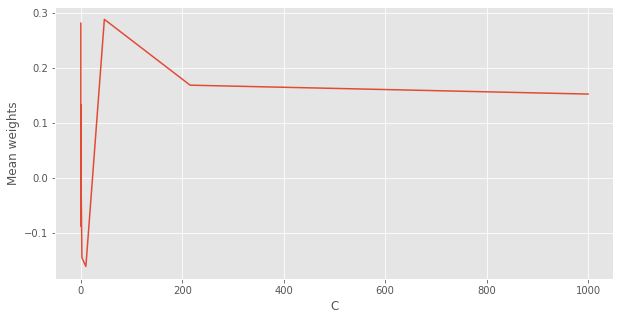

In [420]:
plt.figure(figsize=(10, 5))
coefs = np.logspace(3, -3, 10)
weights_mean = np.zeros(coefs.shape)

for i, C in enumerate(coefs):
    model = MySGDClassifier(model_type='log_reg', 
                            batch_generator=batch_generator, 
                            max_epoch=1, 
                            alpha=0.001,
                            C=C)
    model.fit(X, y, batch_size=100)
    weights_mean[i] = model.weights.mean()
    
plt.plot(coefs, weights_mean)
plt.xlabel('C')
plt.ylabel('Mean weights')
plt.show()

Довольны ли Вы, насколько сильно уменьшились Ваши веса? 

# Боевое применение (3  балла)

Давайте применим модель на итоговом проекте! Датасет сделаем точно таким же образом, как было показано в project_overview.ipynb

Применим обе регрессии, подберем для них параметры и сравним качество. Может быть Вы еще одновременно с решением домашней работы подрастете на лидерборде!

In [106]:
doc_to_title = {}
with open('docs_titles.tsv') as f:
    for num_line, line in enumerate(f):
        if num_line == 0:
            continue
        data = line.strip().split('\t', 1)
        doc_id = int(data[0])
        if len(data) == 1:
            title = ''
        else:
            title = data[1]
        doc_to_title[doc_id] = title
print (len(doc_to_title))


28026


In [107]:
import pandas as pd
train_data = pd.read_csv('train_groups.csv')
traingroups_titledata = {}
for i in range(len(train_data)):
    new_doc = train_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    target = new_doc['target']
    title = doc_to_title[doc_id]
    if doc_group not in traingroups_titledata:
        traingroups_titledata[doc_group] = []
    traingroups_titledata[doc_group].append((doc_id, title, target))

In [108]:
import numpy as np
y_train = []
X_train = []
groups_train = []
for new_group in traingroups_titledata:
    docs = traingroups_titledata[new_group]
    for k, (doc_id, title, target_id) in enumerate(docs):
        y_train.append(target_id)
        groups_train.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j, target_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_train.append(sorted(all_dist, reverse=True)[0:15]    )
X_train = np.array(X_train)
y_train = np.array(y_train)
groups_train = np.array(groups_train)
print (X_train.shape, y_train.shape, groups_train.shape)

(11690, 15) (11690,) (11690,)


Подберите размер батча для обучения. Линейная модель не должна учиться дольше нескольких минут. 

Не забывайте использовать скейлер!

In [109]:
from sklearn.metrics import f1_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [110]:
scaler = StandardScaler().fit(X_train)
X_train_std = scaler.transform(X_train)

/home/alexfes/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/alexfes/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Разбейте данные на обучение и валидацию. Подберите параметры C, alpha, max_epoch, model_type на валидации (Вы же помните, как правильно в этой задаче делать валидацию?)

In [119]:
from itertools import groupby
from functools import reduce

# List of sizes for each document group for validation
group_sizes = [len(list(val)) for (k, val) in groupby(groups_train)]

X_test = X_train_std[:reduce(lambda x, y: x+y, group_sizes[:len(group_sizes)//2])]
y_test = y_train[:reduce(lambda x, y: x+y, group_sizes[:len(group_sizes)//2])]

X_train = X_train_std[reduce(lambda x, y: x+y, group_sizes[:len(group_sizes)//2]):]
y_train_new = y_train[reduce(lambda x, y: x+y, group_sizes[:len(group_sizes)//2]):]

Подберите порог линейной модели, по достижении которого, Вы будете относить объект к классу 1. Вспомните, какую метрику мы оптимизируем в соревновании.  Как тогда правильно подобрать порог?

In [121]:
classifier = LinearRegression().fit(X_train, y_train_new)
pred = classifier.predict(X_test)

# threshold for f score
actual_prediction = [1 if prediction > 0.3 else 0 for prediction in pred]

f1_score(y_test, actual_prediction)

0.6134167140420693

In [123]:
classifier.get_params(deep=True)

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

С лучшими параметрами на валидации сделайте предсказание на тестовом множестве, отправьте его на проверку на платформу kaggle. Убедитесь, что Вы смогли побить public score первого бейзлайна.

** При сдаче домашки Вам необходимо кроме ссылки на ноутбук прислать Ваш ник на kaggle, под которым Вы залили решение, которое побило первый бейзлайн. **

In [ ]:
test_data = pd.read_csv('test_groups.csv')
traingroups_titledata = {}
for i in range(len(test_data)):
    new_doc = test_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    title = doc_to_title[doc_id]
    if doc_group not in traingroups_titledata:
        traingroups_titledata[doc_group] = []
    traingroups_titledata[doc_group].append((doc_id, title, target))
    
X_test = []
for new_group in traingroups_titledata:
    docs = traingroups_titledata[new_group]
    for k, (doc_id, title, target_id) in enumerate(docs):
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j, target_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_test.append(sorted(all_dist, reverse=True)[0:15]    )
X_test = np.array(X_test)

X_test_std = scaler.transform(X_test)
test_pred = classifier.predict(X_test_std)
actual_prediction = [1 if prediction > 0.3 else 0 for prediction in test_pred]

import csv

with open('first_submission.csv', 'w') as f:
    writer = csv.writer(f)
    writer.writerow(['pair_id', 'target'])

    for i in range(len(test_data)):
        new_doc = test_data.iloc[i]
        pair_id = new_doc['pair_id']
        target = actual_prediction[i]
        writer.writerow([pair_id, target])

# Фидбек (бесценно)

* Какие аспекты обучения линейных моделей Вам показались непонятными? Какое место стоит дополнительно объяснить?

***Ваше ответ здесь***

* Здесь Вы можете оставить отзыв о этой домашней работе или о всем курсе.   

*** ВАШ ОТЗЫВ ЗДЕСЬ***